In [1]:
from afinn import Afinn
import matplotlib.pyplot as plt

# this is an example on sentiment analysis
afinn = Afinn(emoticons=True)
afinn.score('This is utterly excellent!')

3.0

In [46]:
import pandas as pd

# read in the two csv files
# merge them on the 'url' column into ted.csv
scripts = pd.read_csv("data/transcripts.csv")
ted_main= pd.read_csv("data/ted_main.csv")
ted= pd.merge(scripts, ted_main, on='url')
print len(ted)

# get the column "transcripts" from ted.csv
# print how many talks
transcripts = ted["transcript"]
length = len(transcripts)
print "There are " + str(length) + " talks"

2467
There are 2467 talks


In [47]:
import datetime

unix_film_dates = ted["film_date"]
unix_publish_dates = ted["published_date"]


#function to get sentiment score for a str
def get_senti_score(str):
    score = afinn.score(str)
    return score

#function to get the year
def get_year_film(i):
    film_year=datetime.datetime.fromtimestamp(int(unix_film_dates[i])).strftime('%Y')
    return film_year

In [75]:
import datetime

unix_film_dates = ted["film_date"]
unix_publish_dates = ted["published_date"]

# get list of the readable filmed dates of first ten talks based on unix timestamp
filmYear=[]
for i in range(0, length):
    real_filmdate=datetime.datetime.fromtimestamp(int(unix_film_dates[i])).strftime('%Y')
    filmYear.append(real_filmdate)

# get list of the readable published dates of first ten talks based on unix timestamp
publishDate=[]
for i in range(0, 1):
    real_publishdate=datetime.datetime.fromtimestamp(int(unix_publish_dates[i])).strftime('%Y-%m-%d')
    publishDate.append(real_publishdate)

senti_scores=[]
for i in range(0,length):
    score = afinn.score(transcripts[i])
    senti_scores.append(score)


In [94]:
d_year_sentiScore = zip(filmYear, senti_scores)

years_dict = dict()
for i in range(0, len(d_year_sentiScore)):
    year = filmYear[i]
    score = senti_scores[i]
    if year in years_dict:
        # append the new number to the existing array at this slot
        years_dict[year].append(score)
    else:
        # create a new array in this slot
        years_dict[year] = [score]

In [110]:
import collections

years_dict_avg = dict()

for y,s in years_dict.iteritems():
    # v is the list of grades for student k
    years_dict_avg[y] = sum(s)/ float(len(s))    
    

years_dict_avg = collections.OrderedDict(sorted(years_dict_avg.items()))

print years_dict_avg

OrderedDict([('1984', 121.0), ('1990', 198.0), ('1994', 76.0), ('1998', 95.16666666666667), ('2001', 69.5), ('2002', 96.96296296296296), ('2003', 82.06060606060606), ('2004', 124.71875), ('2005', 78.98387096774194), ('2006', 87.91489361702128), ('2007', 72.25454545454545), ('2008', 71.7875), ('2009', 63.17351598173516), ('2010', 63.8062015503876), ('2011', 56.19665271966527), ('2012', 51.79693486590038), ('2013', 51.8134328358209), ('2014', 51.0253164556962), ('2015', 48.85774058577406), ('2016', 46.92622950819672), ('2017', 58.43877551020408)])


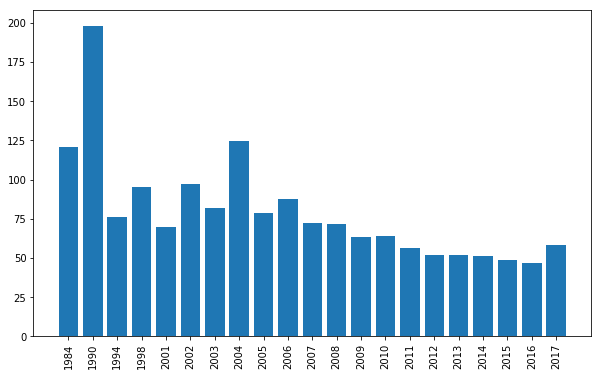

In [116]:
import matplotlib.pyplot as plt

data = years_dict_avg
names = list(data.keys())
values = list(data.values())

#tick_label does the some work as plt.xticks()
plt.figure(figsize=(10,6))
plt.bar(range(len(data)), data.values(), align='center')
plt.xticks(range(len(data)), data.keys(), rotation=90)

plt.show()


In [218]:
from collections import Counter

all_tags = []
for i in range(0, length):
    string_tags = ted['tags'][i].rstrip().replace("'", "")[1:-1].split(',')
    all_tags.append(string_tags)

d_year_tags = zip(filmYear, all_tags)

tags_dict = dict()
for i in range(0, len(d_year_tags)):
    year = filmYear[i]
    tags = all_tags[i]
    if year in tags_dict:
        # append the new number to the existing array at this slot
        tags_dict[year].append(tags)
    else:
        # create a new array in this slot
        tags_dict[year] = [tags]
        
for year, tagsLists in tags_dict.iteritems(): 
    flat_list = []
    for tagsList in tagsLists:
        for tag in tagsList:
            flat_list.append(tag)
    tags_dict[year] = flat_list
        
for year, tagsLists in tags_dict.iteritems(): 
    tags_dict[year] = Counter(tagsLists).most_common(10)
    

print tags_dict.get('2004')

[(' culture', 12), (' entertainment', 10), (' technology', 10), (' design', 7), (' happiness', 7), (' performance', 6), (' psychology', 6), (' science', 6), (' music', 5), ('business', 5)]


In [226]:
from pprint import pprint
pprint(tags_dict)


{'1984': [(' interface design', 1),
          (' entertainment', 1),
          ('demo', 1),
          (' media', 1),
          (' movies', 1),
          (' future', 1),
          (' design', 1),
          (' technology', 1)],
 '1990': [(' collaboration', 1),
          (' technology', 1),
          (' global issues', 1),
          ('architecture', 1),
          (' design', 1)],
 '1994': [(' evolution', 1),
          (' life', 1),
          ('DNA', 1),
          (' genetics', 1),
          (' science', 1),
          (' computers', 1),
          (' TED Brain Trust', 1),
          (' programming', 1),
          (' history', 1),
          (' future', 1)],
 '1998': [(' technology', 5),
          (' design', 4),
          (' culture', 2),
          (' solar energy', 1),
          (' faith', 1),
          ('art', 1),
          (' science', 1),
          ('demo', 1),
          (' prosthetics', 1),
          ('Christianity', 1)],
 '2001': [('culture', 2),
          (' poetry', 2),
          ('ar